In this notebook, I succeeded in the data set from kaggle's Bitcoin Blockchain,
I would like to provide even a bit of information to help you understand how dealings have been done on bit coin networks and how transactions work.

Let us start by checking what tables are available to us Kagglers. 
For this, we create a convenient BigQueryHelper instance that will make the data estimate and make the result visualizable with pandasDataFrame..

In [116]:
from google.cloud import bigquery
import pandas as pd
from  bq_helper import BigQueryHelper
import numpy as np 
import pandas as pd 

bq_assistant = BigQueryHelper("bigquery-public-data", "bitcoin_blockchain")
bitcoin_blockchain = bq_helper.BigQueryHelper("bigquery-public-data","bitcoin_blockchain")

Let's display the filename of the dataset by using helper's list_tables method.

In [49]:
%%time
bitcoin_blockchain.list_tables()

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 413 ms


['blocks', 'transactions']

Check the data capacity of "blocks" and "transactions" respectively.

In [162]:
client= bigquery.Client()
github_dset = client.get_dataset(client.dataset('bitcoin_blockchain', project='bigquery-public-data'))
blocks_table = client.get_table(github_dset.table('blocks'))
BYTES_PER_GB = 2**30
print(f'The blocks table is {int(blocks_table.num_bytes/BYTES_PER_GB)} GB')

The blocks table is 497 GB


In [163]:
client= bigquery.Client()
github_dset = client.get_dataset(client.dataset('bitcoin_blockchain', project='bigquery-public-data'))
transactions_table = client.get_table(github_dset.table('transactions'))
BYTES_PER_GB = 2**30
print(f'The transactions table is {int(transactions_table.num_bytes/BYTES_PER_GB)} GB')

The transactions table is 567 GB


Let's take a look at the data contents of "blocks" and "transactions" further.

In [52]:
%%time
bitcoin_blockchain.table_schema("blocks")

CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 166 ms


,name,type,mode,description
0,block_id,STRING,NULLABLE,None
1,previous_block,STRING,NULLABLE,None
2,merkle_root,STRING,NULLABLE,None
3,timestamp,INTEGER,NULLABLE,None
4,difficultyTarget,INTEGER,NULLABLE,None
5,nonce,INTEGER,NULLABLE,None
6,version,INTEGER,NULLABLE,None
7,work_terahash,INTEGER,NULLABLE,None
8,work_error,STRING,NULLABLE,None
9,transactions,RECORD,REPEATED,None


In [53]:
%%time
bitcoin_blockchain.head("blocks")
#test_data=bitcoin_blockchain.head("transactions")

CPU times: user 1.17 s, sys: 100 ms, total: 1.27 s
Wall time: 4.32 s


,block_id,previous_block,merkle_root,timestamp,difficultyTarget,nonce,version,work_terahash,work_error,transactions,row_number
0,00000000000000000013ea7bf3341efa41d62f31f88a5d...,00000000000000000014cfc296ca60674de142687db02a...,7aa0f355b27377768f94cf813a14dbe6c9aa881ac3add3...,1523401911000,391129783,1658186013,536870912,150801203533,None,[{'transaction_id': '4da7ccd53a7383c9b5adc2f3d...,1
1,00000000000004ddb208eb76ffb9850b4f9d54043eefc1...,000000000000014580ad44066f56410d57722d527e9d2e...,f34cf854a6cbc9f7a33fc2af0c4a634e24f8d8248c460d...,1356527347000,436533858,1937683172,2,144750,None,[{'transaction_id': '77bc8227e2d0f3c9347aea32c...,1
2,0000000000000000013203c7f6794753b1194942b931a3...,0000000000000000069f78f47a57f2d76163afdff93958...,26fcd3b0946604ebcbe7de3c6b30613ad3e54a878cfb62...,1454338315000,403253488,1024021009,4,5155471391,None,[{'transaction_id': 'd9926d177d678c45bbf456ad4...,1
3,0000000000000000004018e9a95d55503319e30c066d08...,000000000000000000f2b12cee5665fa5ba3c1112f4ff2...,b82120aeb94c54c933090edef14f05a01e42d90d27a571...,1496809520000,402759343,1838526193,536870912,29152969585,None,[{'transaction_id': '4ba1d92cc7b8bc1452470f388...,1
4,000000000000000004c9a5362024d2cc08a481a1f0abc5...,000000000000000004d5ff43315e922eb99ac47d7984d8...,e3ce713321b7d6c46702676f16afec6502e2213c557198...,1472175930000,402984668,1455108874,536870912,9336348355,None,[{'transaction_id': '6d97e17eb4e6e5a2fc9b94af4...,1


In [54]:
%%time
bitcoin_blockchain.table_schema("transactions")

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 215 ms


,name,type,mode,description
0,timestamp,INTEGER,NULLABLE,None
1,transaction_id,STRING,NULLABLE,None
2,inputs,RECORD,REPEATED,None
3,inputs.input_script_bytes,BYTES,NULLABLE,None
4,inputs.input_script_string,STRING,NULLABLE,None
5,inputs.input_script_string_error,STRING,NULLABLE,None
6,inputs.input_sequence_number,INTEGER,NULLABLE,None
7,inputs.input_pubkey_base58,STRING,NULLABLE,None
8,inputs.input_pubkey_base58_error,STRING,NULLABLE,None
9,outputs,RECORD,REPEATED,None


In [55]:
%%time
bitcoin_blockchain.head("transactions")

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 1.17 s


,timestamp,transaction_id,inputs,outputs,block_id,previous_block,merkle_root,nonce,version,work_terahash,work_error
0,1503187061000,9dbba647f9735c13ddfa81dbf81843b726fcb2ec5fdca3...,[{'input_script_bytes': b'\x00H0E\x02!\x00\xdd...,"[{'output_satoshis': 4900000, 'output_script_b...",000000000000000000909dbf0da4c8b2786ca5165e10da...,0000000000000000011c75d143206e051d9e6f300c2ffe...,4875ca20d1dcd6489888721f038838cf9d681358a64b52...,1548654941,536870930,39653163414,None
1,1512188167000,09a49b6058ced488f48c6f3ca930a3e981bc31d5cbd58e...,[{'input_script_bytes': b'G0D\x02 \x0b\xd7\xc7...,"[{'output_satoshis': 6458345, 'output_script_b...",0000000000000000008f645bada14ed27f7c0acbe71edb...,0000000000000000001b892ec743083f050b8aadf0c61b...,401948c0876bcdd27a4d5a5e35d8c6c5333f4291260211...,3358992234,536870912,57854153703,None
2,1485001277000,4f11760d5eb0e8663da27ad7525b4981230fe392f4e6cd...,[{'input_script_bytes': b'\x00H0E\x02!\x00\x91...,"[{'output_satoshis': 3665784, 'output_script_b...",0000000000000000000a6e2b937607207bbb6d390a969a...,000000000000000002734fee761d4d25b7ea92ae505aa5...,928b5e24b19e4296072b68f42e051269342751a5b322eb...,5181318,536870912,14469962727,None
3,1519842188000,ac7c45e84980456eb0f88cb23ea3f73b3670d10443419a...,"[{'input_script_bytes': b'""\x00 \xb96\\\xd3\x9...","[{'output_satoshis': 95700, 'output_script_byt...",0000000000000000000f26659b7954521b0c77fc107064...,0000000000000000001909977e779e34a0a06fc6b7691d...,2962eeb736dc1cce6fd6600302bdca31136277f67e7054...,1227606229,536870912,129168124477,None
4,1521813647000,4c903ddfdf82ff9bfa5ca167aa882b7c623491271bf9bd...,[{'input_script_bytes': b'H0E\x02!\x00\xa0h\xb...,"[{'output_satoshis': 700000, 'output_script_by...",000000000000000000096b7a666bcb74c87d059ba5197d...,0000000000000000004c1bc335c1e009636a3994027f3b...,f26a597c96c6740dba2da71274c1d0eb04e4524da37949...,1836305320,536870912,148717332558,None


Next, with the head of the data set transactions as sample data, we refer to "inputs and" outputs and check whether bit coin transactions are reflected in each data as with.

First I will look at the contents of input data of sample data.
Input data is stored as a dictionary array and has 6 keys and value.

In [142]:
sample_data=bitcoin_blockchain.head("transactions")
# x["input_pubkey_base58"]="1L6eTM7CdfU9eQwYWf3u8mFPrfxsiqV8hy"
x=sample_data.iloc[2].inputs[0]
print(x)

{'input_script_bytes': b'G0D\x02 F\xde\xb9%\x00;\xf3M\xd5\x9c/\x97-h\x80\xb5\x92\x96\xa3\xba\xa2\xa3-y\x12\xca\xdd\x90\x99(\xe1\xac\x02 x\xcc\xaf\xb2\x89\xdc!\x9e\x0cx\xde\xae\xd5\xa1Y\xaa^\xdc\xedh:\x8b*\xc3dO\xf6\xa3e\x9c\xad\x9d\x01!\x02\x9er`\xb4u\x9a"B\xe5\x9f\xf5S\xb8\xc0\x005d\xde\x15\xb5\xa0\x81\x89\r@\xb3\x8a>\x18\xcd\x80\x0e', 'input_script_string': 'PUSHDATA(71)[3044022046deb925003bf34dd59c2f972d6880b59296a3baa2a32d7912cadd909928e1ac022078ccafb289dc219e0c78deaed5a159aa5edced683a8b2ac3644ff6a3659cad9d01] PUSHDATA(33)[029e7260b4759a2242e59ff553b8c0003564de15b5a081890d40b38a3e18cd800e]', 'input_script_string_error': None, 'input_sequence_number': 4294967295, 'input_pubkey_base58': '1Ph1bNYQPeTuyi9E3HSyZq7WcSuYJgpQ5x', 'input_pubkey_base58_error': None}


"Input data" input_pubkey_base 58 '"is a bit coin address, like an" account number "when using bit coins. The bit coin address consists of 27 to 34 alphanumeric characters beginning with 1 or 3 and is generated from the public key. In this case, it will be "1PibuCMFxvk3i1p188AD8785vdz3CmkoWB".
 
  Let's take a look at the output of the transaction.

In [143]:
x=sample_data.iloc[3].outputs[0]
#x["output_satoshis"]=4000000
x["output_pubkey_base58"]= "1NhG34WuLN6aWEdbzt6VE4tJQLUem8J43Z"
print(x)

{'output_satoshis': 12561, 'output_script_bytes': b'\x00\x14+(\xde6\xcc\x10\xa1?\x97\xcc\xa9\xd3\xbd\xe8\xdd\xbb2C\x90\xfd', 'output_script_string': '0[] PUSHDATA(20)[2b28de36cc10a13f97cca9d3bde8ddbb324390fd]', 'output_script_string_error': None, 'output_pubkey_base58': '1NhG34WuLN6aWEdbzt6VE4tJQLUem8J43Z', 'output_pubkey_base58_error': 'Cannot cast this script to a pay-to-address type'}


The bit coin address of this outputs data is "1L6eTm7CdfU9eQwYWf3u8mFPrfxsiqV8hy".
'output_satoshis' is the amount of bit coin to send. 'Sathoshi' is the smallest unit of bit coin, 1 Bitcoin = 100,000,000 satoshis, or 1 Satoshi = 1e-8 BTC.

This output specifies that "satoshis" (or 0.00012561 bit coin) of 12561 should be transferred to the address 'address_pubkey_base 58': '1NhG34WuLN6aWEdbzt6VE4tJQLUem8J43Z'.


The proof of the bit coin owner is 'output' which is unpaid for the bit coin address and the script in the variable 'output_script_string' shows.
An output script that sets the condition that only the 'private_key' owner of the specified 'public_key' has the right to use this output.

In [124]:
print(sample_data.iloc[2].outputs[0])

{'output_satoshis': 128923348, 'output_script_bytes': b'v\xa9\x14\xa5\xb8\xa9\x19\x96!yOz\xd49\xf0#\xd1\xf7\x16\x1d\x8d2\xd2\x88\xac', 'output_script_string': 'DUP HASH160 PUSHDATA(20)[a5b8a9199621794f7ad439f023d1f7161d8d32d2] EQUALVERIFY CHECKSIG', 'output_script_string_error': None, 'output_pubkey_base58': '1G7Fi6KbViEcU7qZgHjdai3j29hK85eMBL', 'output_pubkey_base58_error': None}


In [58]:
from google.cloud import bigquery
import pandas as pd

client = bigquery.Client()

# Query by Allen Day, GooglCloud Developer Advocate (https://medium.com/@allenday)
query = """
#standardSQL
SELECT
  o.day,
  COUNT(DISTINCT(o.output_key)) AS recipients
FROM (
  SELECT
    TIMESTAMP_MILLIS((timestamp - MOD(timestamp,
          86400000))) AS day,
    output.output_pubkey_base58 AS output_key
  FROM `bigquery-public-data.bitcoin_blockchain.transactions`,
    UNNEST(outputs) AS output ) AS o
GROUP BY day
ORDER BY day
"""

query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)

# Transform the rows into a nice pandas dataframe
transactions = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# Look at the first 10 headlines
transactions.head(10)

,day,recipients
0,2009-01-09 00:00:00+00:00,0
1,2009-01-10 00:00:00+00:00,0
2,2009-01-11 00:00:00+00:00,0
3,2009-01-12 00:00:00+00:00,0
4,2009-01-13 00:00:00+00:00,0
5,2009-01-14 00:00:00+00:00,0
6,2009-01-15 00:00:00+00:00,0
7,2009-01-16 00:00:00+00:00,1
8,2009-01-17 00:00:00+00:00,0
9,2009-01-18 00:00:00+00:00,0


Next, we plot the number of transactions per day for the entire transactions data period.

In [59]:
transactions_total = bitcoin_blockchain.query_to_pandas_safe( """
       WITH time AS (
                SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time,
                    transaction_id
                FROM `bigquery-public-data.bitcoin_blockchain.transactions`
            )
            SELECT COUNT(transaction_id) AS transactions,
                EXTRACT(DAY FROM trans_time) AS day,
                EXTRACT(MONTH FROM trans_time) AS month,
                EXTRACT(YEAR FROM trans_time) AS year
            FROM time
            GROUP BY year, month ,day
            ORDER BY year, month,day
        """, max_gb_scanned=23)

transactions_total.head(10)

,transactions,day,month,year
0,14,9,1,2009
1,61,10,1,2009
2,93,11,1,2009
3,101,12,1,2009
4,123,13,1,2009
5,130,14,1,2009
6,134,15,1,2009
7,110,16,1,2009
8,109,17,1,2009
9,108,18,1,2009


Text(0.5,1,'Bitcoin Transcations')

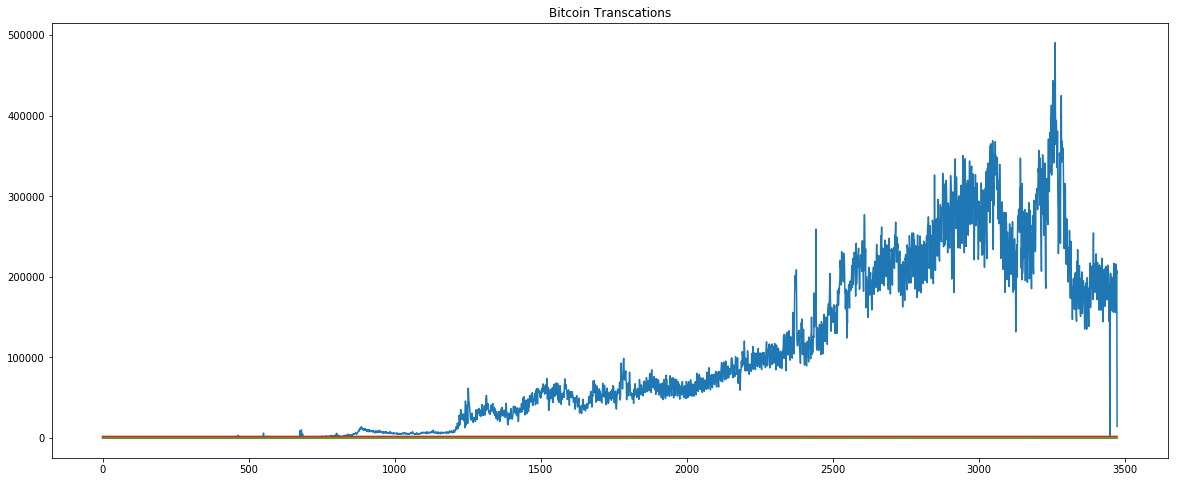

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot monthly bitcoin transactions
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(transactions_total)
plt.title("Bitcoin Transcations")

Next, we plot the number of transactions per month.

In [61]:
transactions_per_month = bitcoin_blockchain.query_to_pandas_safe( """
       WITH time AS (
                SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time,
                    transaction_id
                FROM `bigquery-public-data.bitcoin_blockchain.transactions`
            )
            SELECT COUNT(transaction_id) AS transactions,
                EXTRACT(MONTH FROM trans_time) AS month,
                EXTRACT(YEAR FROM trans_time) AS year
            FROM time
            GROUP BY year, month 
            ORDER BY year, month
        """, max_gb_scanned=23)

transactions_per_month 

,transactions,month,year
0,2575,1,2009
1,3417,2,2009
2,3487,3,2009
3,3459,4,2009
4,3401,5,2009
5,2244,6,2009
6,1930,7,2009
7,1570,8,2009
8,2170,9,2009
9,2139,10,2009


Text(0.5,1,'Monthly Bitcoin Transcations')

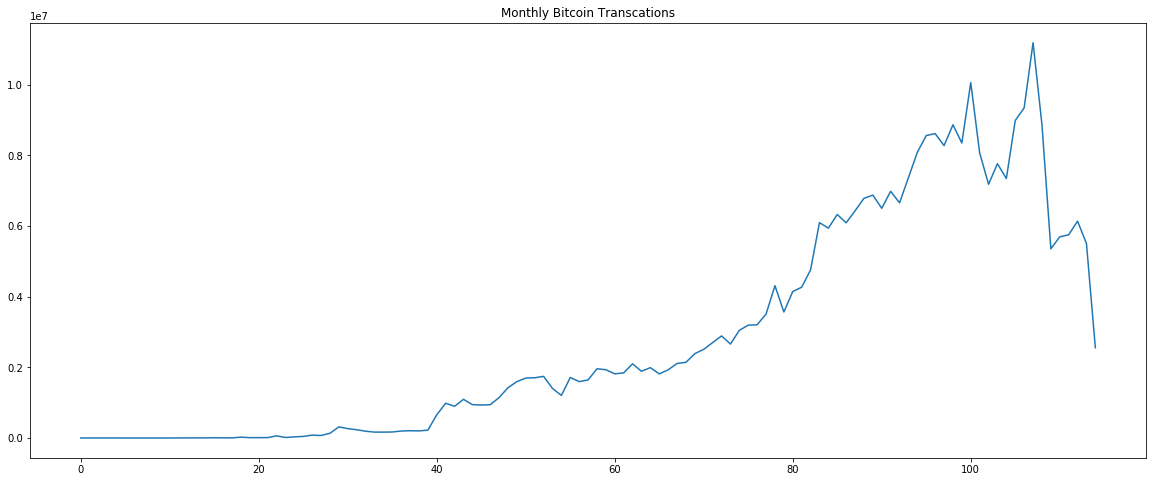

In [146]:
#import plotting library
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,8)
# plot monthly bitcoin transactions
plt.plot(transactions_per_month.transactions)
plt.title("Monthly Bitcoin Transcations")

We will plot the number of transactions for bit coins in 2017.

In [63]:
transaction_by_day_2017 = bitcoin_blockchain.query_to_pandas_safe("""
     WITH time AS (
           SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time,
           transaction_id
       FROM `bigquery-public-data.bitcoin_blockchain.transactions`
     )
    SELECT COUNT(transaction_id) AS number,
       EXTRACT(month FROM trans_time) AS month,
       EXTRACT(day FROM trans_time) AS day
    FROM time
    WHERE EXTRACT(year FROM trans_time)=2017
    GROUP BY month,day
    ORDER BY month,day
""",max_gb_scanned=23)
transaction_by_day_2017

,number,month,day
0,180502,1,1
1,290951,1,2
2,301664,1,3
3,328642,1,4
4,288501,1,5
5,346405,1,6
6,282060,1,7
7,260101,1,8
8,269947,1,9
9,323888,1,10


Text(0.5,1,'Daily Number of Transcations in 2017')

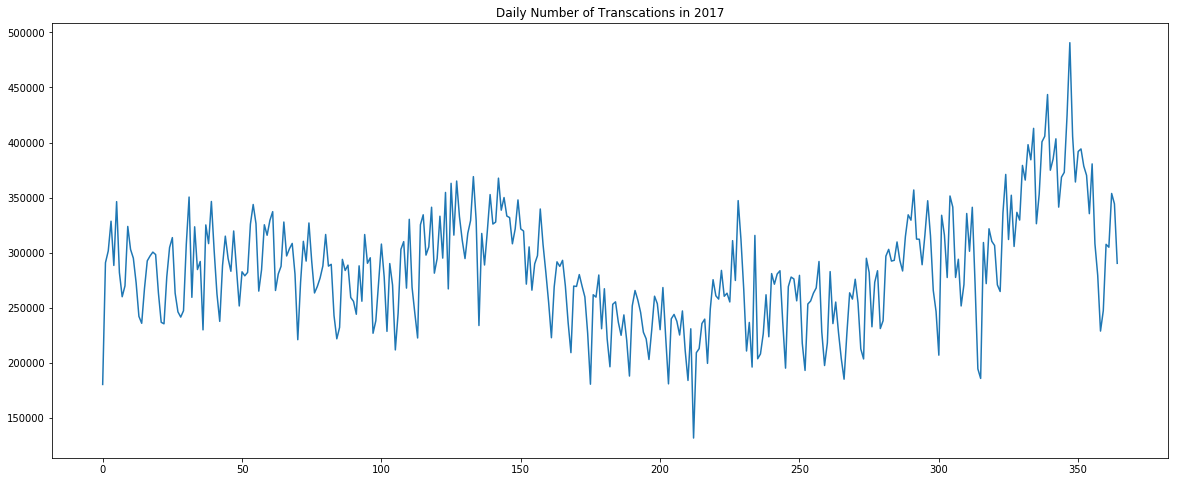

In [149]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(transaction_by_day_2017.number)
plt.title('Daily Number of Transcations in 2017')

次に2018年の取引数の推移をプロットします。

In [65]:
transaction_by_day_2018 = bitcoin_blockchain.query_to_pandas_safe("""
     WITH time AS (
           SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time,
           transaction_id
       FROM `bigquery-public-data.bitcoin_blockchain.transactions`
     )
    SELECT COUNT(transaction_id) AS number,
       EXTRACT(month FROM trans_time) AS month,
       EXTRACT(day FROM trans_time) AS day
    FROM time
    WHERE EXTRACT(year FROM trans_time)=2018
    GROUP BY month,day
    ORDER BY month,day
""",max_gb_scanned=23)
transaction_by_day_2018

,number,month,day
0,241757,1,1
1,340980,1,2
2,395963,1,3
3,425008,1,4
4,342707,1,5
5,358847,1,6
6,368187,1,7
7,345672,1,8
8,360265,1,9
9,347393,1,10


Text(0.5,1,'Daily Number of Transcations in 2018')

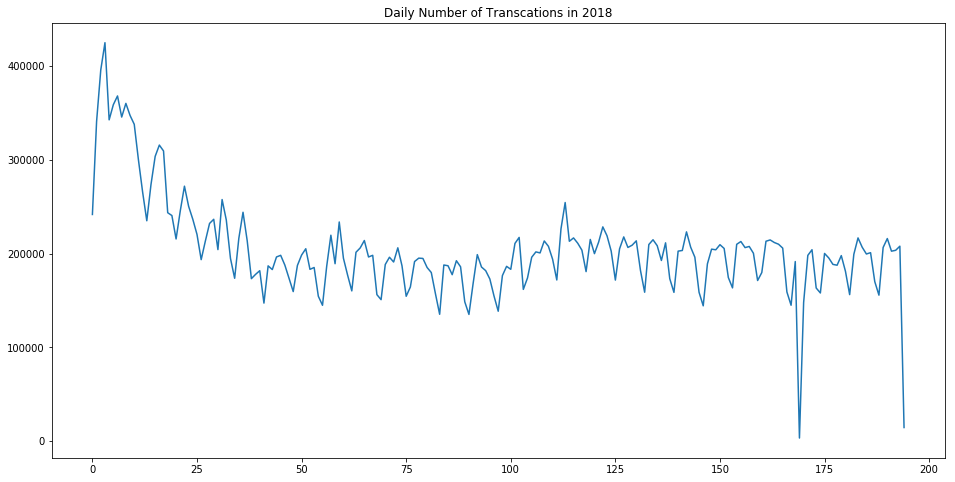

In [151]:
# _=plt.plot(transaction_by_day_2018.number)

plt.rcParams["figure.figsize"] = (16,8)
plt.plot(transaction_by_day_2018.number)
plt.title('Daily Number of Transcations in 2018')

Finally, we plot the histogram of bit coin trading volume top 20 people.

In [157]:
import hashlib
import os
''' I have made this simple class to save the data i am getting from query, So that If I
Ever Run this program again I dont have to use my quota but get it directly from the
place where I have saved it... :##'''
class DataSaver:
    def __init__(self, bq_assistant):
        self.bq_assistant=bq_assistant
        
    def Run_Query(self, query, max_gb_scanned=1):
        hashed_query=''.join(query.split()).encode("ascii","ignore")
        query_hash=hashlib.md5(hashed_query).hexdigest()
        query_hash+=".csv"
        if query_hash in os.listdir(os.getcwd()):
            print ("Data Already present getting it from file")
            return pd.read_csv(query_hash)
        else:
            data=self.bq_assistant.query_to_pandas_safe(query, max_gb_scanned=max_gb_scanned)
            data.to_csv(query_hash, index=False,encoding='utf-8')
            return data
        
bq=DataSaver(bq_assistant)

In [158]:
q = """
SELECT  o.output_pubkey_base58, sum(o.output_satoshis) as output_sum FROM
    `bigquery-public-data.bitcoin_blockchain.transactions` JOIN
    UNNEST(outputs) as o 
    where o.output_pubkey_base58 not in (select i.input_pubkey_base58
    from UNNEST(inputs) as i)
    group by o.output_pubkey_base58 order by output_sum desc limit 1000
"""

print (str(round((bq_assistant.estimate_query_size(q)),2))+str(" GB"))

results=bq.Run_Query(q, max_gb_scanned=70)
results["output_sum"]=results["output_sum"].apply(lambda x: float(x/100000000))

60.08 GB


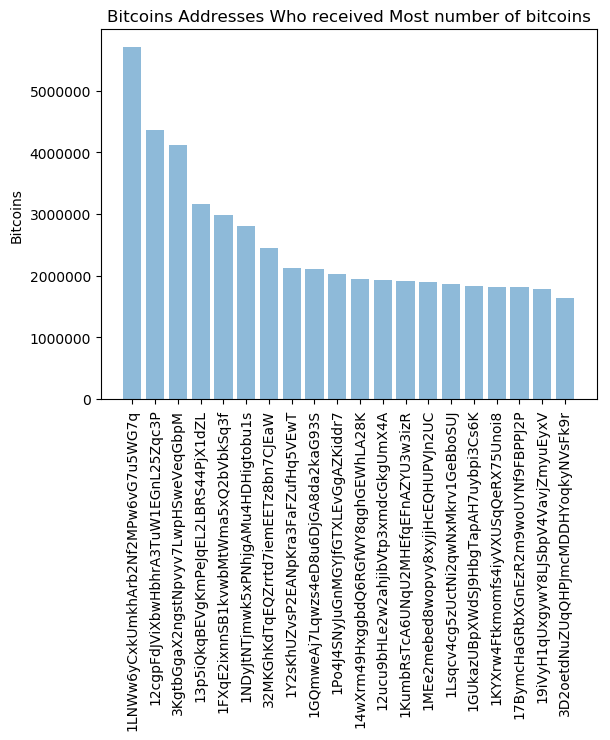

In [161]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
objects = results["output_pubkey_base58"][:20]
y_pos = np.arange(len(objects))
performance = results["output_sum"][:20]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Bitcoins')
plt.title('Bitcoins Addresses Who received Most number of bitcoins')
plt.show()